<a href="https://colab.research.google.com/github/annanya-mathur/Building-my-own-Artificial-Neural-Network/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Predicting whether any Station in India has polluted water bodies or not

**For Detecting Water Quality different Parameters are:-**

1.   PH  (==7)
2.   CONDUCTIVITY (µmhos/cm)
3.   Dissolved Oxygen (mg/l)
4.   Temperature
5.   Biochemical Oxygen Demand (mg/l)
6.   NITRATENAN N+ NITRITENANN (mg/l)
7.   TOTAL COLIFORM (MPN/100ml)Mean



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [86]:
df=pd.read_excel('/content/water-_2_.xls')
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,0.0,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428.0,5500.0,2014


In [88]:
df.sort_values(by='STATION CODE', ascending=True)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
245,2,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,0.0,0.0,0.0,208,0.0,0,0.0,0.0,2013
865,17,PERIYAR NEAR ALWAYENANELOOR,KERALA,27.5,5.6,6.9,943,1.5,0.4,655.0,1925.0,2011
375,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA,28.2,6.0,7.0,5569,2.2,0.68,473.0,1894.0,2013
118,17,"PERIYAR NEAR ALWAYENANELOOR, KERALA",KERALA,28.1,5.0,6.9,3185,1.8,0.4,290.0,667.0,2014
627,17,PERIYAR NEAR ALWAYENANELOOR,KERALA,28.0,5.1,6.9,1789,2.1,0.68,408.0,1946.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
93,3471,"RIVER KARAMANA AT ARUVIKARA, THIRUVANANTHAPURAM",KERALA,25.1,7.4,7.0,35,0.1,0,165.0,409.0,2014
350,3471,"RIVER KARAMANA AT ARUVIKARA, THIRUVANANTHAPURAM",KERALA,26.3,7.0,7.1,30,0.5,0.32,211.0,496.0,2013
391,3473,"RIVER VALAPATTANAM AT PARASSINIKADAVU, KANNUR",KERALA,27.8,6.6,6.8,15525,1.1,0.06,149.0,347.0,2013
643,3473,"RIVER VALAPATTANAM AT PARASSINIKADAVU, KANNUR",KERALA,27.0,6.6,7.1,15158,1.1,0.26,126.0,810.0,2012


In [89]:
Independent=df[['STATION CODE']]
Dependent=df[['PH']]

In [90]:
X_train,X_test,Y_train,Y_test =train_test_split(Independent,Dependent,test_size=0.3)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf=RandomForestRegressor()

In [93]:
Y_train

,PH
484,7.0
586,7.1
260,7.5
556,7.7
474,7.1
...,...
792,7.9
197,8.1
617,7.3
2,6.9


**Training dataset for dependent variable**

In [94]:
Y_test

,PH
455,8.1
407,8.1
213,5.6
102,7.1
840,7.3
...,...
324,7.1
341,7.0
231,6.9
602,7.4


**Testing dataset for dependent variable**

In [95]:
X_train

,STATION CODE
484,3351
586,3464
260,1399
556,2689
474,1631
...,...
792,2672
197,2949
617,2304
2,1475


# MODELING WITH RANDOM FOREST REGRESSION ALGORITHM

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems 

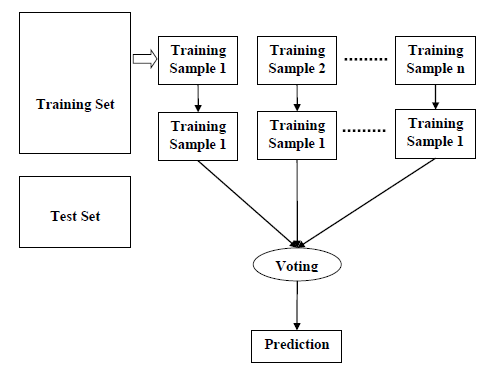

In [96]:
import numpy as np
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 484 to 785
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH      666 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 484 to 785
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   STATION CODE  666 non-null    int64
dtypes: int64(1)
memory usage: 10.4 KB


In [98]:
rf.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
Result=np.array(rf.predict(np.array([[591]])))

In [121]:
if Result>7.0 and Result <7.5:
  print ("Slightly Polluted")
elif Result >7.5:
  print ("Polluted")  
else :
  print ("Not Polluted")  

Slightly Polluted
